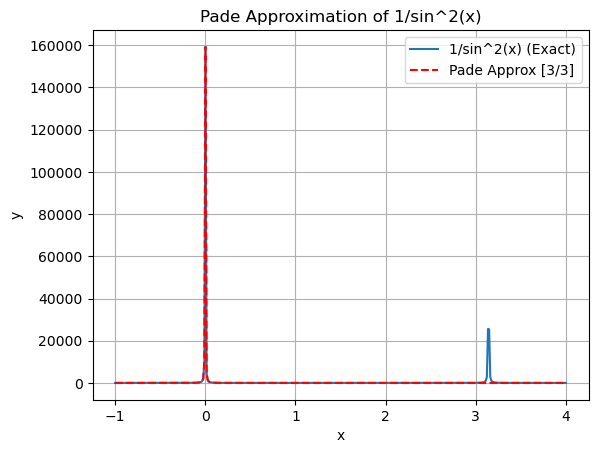

In [40]:
import numpy as np
from scipy.interpolate import pade, lagrange
import matplotlib.pyplot as plt

# Коэффициенты ряда для x^2/sin^2(x), начинающегося с 1
coefficients = [1, 0, 1/3, 0, 2/15, 0, 2/189 ]  # Примерный ряд

# Задаём порядки для числителя и знаменателя аппроксимации Паде
M, N = 4, 6  # Приближение Паде [3/3]
p, q = pade(coefficients, N)

# Функция для аппроксимации
pade_approx = lambda x: p(x) / q(x) / x**2  # обратное масштабирование

# Визуализация
x_values = np.linspace(-1, 4, 400)  # избегаем нуля
plt.plot(x_values, 1/np.sin(x_values)**2, label='1/sin^2(x) (Exact)')
plt.plot(x_values, pade_approx(x_values), 'r--', label='Pade Approx [3/3]')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Pade Approximation of 1/sin^2(x)')
plt.grid(True)
plt.show()


x**6/675 + 2*x**4/189 + x**2/15 + 1/3 + x**(-2)


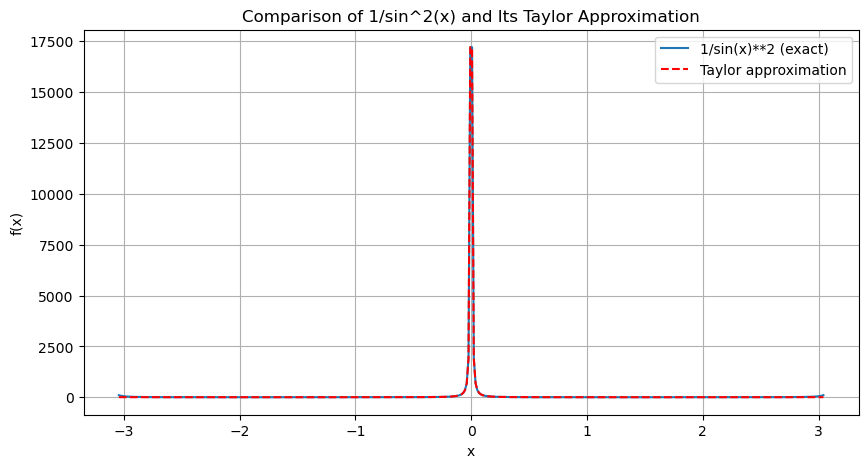

In [37]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Определяем символьную переменную
x = sp.symbols('x')

# Определяем функцию
f = 1/sp.sin(x)**2

# Вычисляем ряд Тейлора для функции 1/sin^2(x) в точке 0, порядок 8
taylor_series = f.series(x, 0, 8).removeO()  # removeO убирает символ O большое

print(taylor_series)

# Чтобы конвертировать ряд в функцию, используем lambda
taylor_func = sp.lambdify(x, taylor_series, 'numpy')

# Теперь можно использовать taylor_func как обычную функцию для numpy массивов
x_values = np.linspace(-np.pi + 0.1, np.pi - 0.1, 400)  # Избегаем точек, где sin(x) = 0
y_values = 1/np.sin(x_values)**2

plt.figure(figsize=(10, 5))
plt.plot(x_values, y_values, label='1/sin(x)**2 (exact)')
plt.plot(x_values, taylor_func(x_values), 'r--', label='Taylor approximation')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Comparison of 1/sin^2(x) and Its Taylor Approximation')
plt.grid(True)
plt.show()
